In [19]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

For Linear Regression:

Load the dataset into a DataFrame object using the Pandas library.

In [20]:
df = pd.read_csv(r"C:\Users\LOQ\Machine Learning Assignment\Final Assesment\Life Expectancy Data.csv")
df.columns = df.columns.str.strip()

• Perform an initial analysis to gather a detailed description of the dataset. For example:

(a) When and by whom was the dataset created?

-> The dataset was created by the World Health Organization (WHO) in collaboration with the United Nations (for economic data). It aggregates health and economic indicators from 2000 to 2015 across 193 countries. The project acknowledges contributions from researchers like Deeksha Russell and Duan Wang, who compiled and merged data from WHO’s Global Health Observatory (GHO) and UN sources 

(b) How did you access the dataset?

-> I accessed the that through  Kaggle under the title "Life Expectency (WHO)"

(c) How does it align with the chosen UNSDG?

-> This dataset aligns closely with UNSDG 3: Good Health and Well-being, which aims to "ensure healthy lives and promote well-being for all at all ages.

(d) List all the attributes (columns) present in the dataset.

-> The dataset contains 7 columns which are:-
1. Country

2. Year (2000–2015)

3. Status (Developed/Developing)

4. Life Expectancy

5. Adult Mortality (deaths per 1000, ages 15–60)

6. Infant Deaths (per 1000)

7. Alcohol Consumption (liters per capita)

8. Percentage Expenditure (healthcare)

9. Hepatitis B Immunization (%)

10. Measles Cases (per 1000)

11. BMI (average)

12. Under-Five Deaths (per 1000)

13. Polio Immunization (%)

14. Total Expenditure (healthcare)

15. Diphtheria Immunization (%)

16. HIV/AIDS Deaths (per 1000)

17. GDP

18. Population

19. Thinness 1–19 Years (%)

20. Thinness 5–9 Years (%)

21. Income Composition of Resources (index 0–1)

22. Schooling (years)



• Identify potential questions that the dataset could help answer.

-> The potential questions that the dataset could help answer are:
1. How do immunization rates (e.g., polio, hepatitis B) correlate with life expectancy?

2. Does healthcare expenditure improve life expectancy in low-income countries?

3. What is the relationship between adult mortality and socioeconomic factors (e.g., GDP, schooling)?

4. How significant are lifestyle factors (BMI, alcohol consumption) in predicting lifespan?

5. Are densely populated countries more likely to have lower life expectancy?

• Assess the dataset’s suitability for analysis (e.g., data completeness, relevance, and quality).

-> The dataset has missing data (~5% of rows) for GDP, Hepatitis B, and population, especially in smaller nations (e.g., Vanuatu). The relevance is high as it covers critical health, economic, and social factors over 15 years and also aligns with SDG 3 priorities. The dataset is reliable as primary sources are WHO and UN.

2. Conducting Exploratory Data Analysis (EDA):

Understanding the characteristics of the data beforehand is crucial for building a model with
acceptable performance. Before proceeding to build, train, and test the model, write code to
inspect, preview, summarize, explore, and visualize your data.

Preview Data

In [3]:
print("First 5 rows:")
print("first 5 row")
print(df.head())

print("Last 5 rows")
print(df.tail())
print("\nDataset shape:", df.shape)

First 5 rows:
first 5 row
       Country  Year      Status  Life expectancy  Adult Mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   infant deaths  Alcohol  Percentage expenditure  Hepatitis B  Measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   
3             69     0.01               78.184215         67.0     2787  ...   
4             71     0.01                7.097109         68.0     3013  ...   

   Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  Populatio

In [4]:
print("Dataset Info:\n")
df.info()

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   Percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio

(a) Perform data cleaning and compute summary statistics for the dataset.

Handle missing values

In [24]:
print("Missing Values Before Handling:")
print(df.isnull().sum().sort_values(ascending=False))

Missing Values Before Handling:
Population                         652
Hepatitis B                        553
GDP                                448
Total expenditure                  226
Alcohol                            194
Income composition of resources    167
Schooling                          163
thinness 1-19 years                 34
thinness 5-9 years                  34
BMI                                 34
Diphtheria                          19
Polio                               19
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Status                               0
Country                              0
Year                                 0
under-five deaths                    0
Measles                              0
Percentage expenditure               0
HIV/AIDS                             0
dtype: int64


In [25]:
def safe_group_impute(df, col, group_by, method='median'):
    """Smart imputation that handles empty groups"""
    if method == 'median':
        global_fallback = df[col].median()
        group_values = df.groupby(group_by)[col].median()
    elif method == 'mode':
        global_fallback = df[col].mode()[0] if not df[col].mode().empty else df[col].median()
        group_values = df.groupby(group_by)[col].agg(lambda x: x.mode()[0] if not x.mode().empty else global_fallback)
    
    # Map group values to the original DataFrame
    df[col] = df[col].fillna(df[group_by].map(group_values))
    
    # Final global fallback for any remaining NaNs
    df[col] = df[col].fillna(global_fallback)
    return df

# Health Metrics: Country-specific medians
health_cols = ['Life expectancy', 'Adult Mortality', 'BMI', 
               'thinness 1-19 years', 'thinness 5-9 years']
for col in health_cols:
    df = safe_group_impute(df, col, 'Country', 'median')

# Vaccination Rates: Status-based modes
vaccine_cols = ['Polio', 'Diphtheria', 'Hepatitis B']
for col in vaccine_cols:
    df = safe_group_impute(df, col, 'Status', 'mode')

# Economic Indicators: Temporal filling
economic_cols = ['GDP', 'Population', 'Income composition of resources']
df = df.sort_values(['Country', 'Year'])
for col in economic_cols:
    # Forward/backward fill within countries
    df[col] = df.groupby('Country')[col].ffill().bfill()
    # Global median fallback for countries with no history
    df[col] = df[col].fillna(df[col].median())

# Remaining Columns: Global medians
remaining_cols = ['Alcohol', 'Schooling', 'Total expenditure']
for col in remaining_cols:
    df[col] = df[col].fillna(df[col].median())

print("\nMissing Values After Enhanced Handling:")
print(df.isnull().sum().sort_values(ascending=False))


Missing Values After Enhanced Handling:
Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
Percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness 1-19 years                0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64


Remove duplicates (if any)

In [26]:
# Remove duplicates
df = df.drop_duplicates()

# Verify if duplicates are removed
print("Number of duplicates after removal:", df.duplicated().sum())

Number of duplicates after removal: 0


In [27]:
# Convert categorical variable
df['Status'] = pd.get_dummies(df['Status'], drop_first=True)
print(df)

          Country  Year  Status  Life expectancy  Adult Mortality  \
15    Afghanistan  2000    True             54.8            321.0   
14    Afghanistan  2001    True             55.3            316.0   
13    Afghanistan  2002    True             56.2              3.0   
12    Afghanistan  2003    True             56.7            295.0   
11    Afghanistan  2004    True             57.0            293.0   
...           ...   ...     ...              ...              ...   
2926     Zimbabwe  2011    True             54.9            464.0   
2925     Zimbabwe  2012    True             56.6            429.0   
2924     Zimbabwe  2013    True             58.0            399.0   
2923     Zimbabwe  2014    True             59.2            371.0   
2922     Zimbabwe  2015    True             67.0            336.0   

      infant deaths  Alcohol  Percentage expenditure  Hepatitis B  Measles  \
15               88    0.010               10.424960         62.0     6532   
14             

Summary statistics

In [9]:
print("\nData Summary:")
print(df.describe())


Data Summary:
              Year  Life expectancy  Adult Mortality  infant deaths  \
count  2938.000000      2938.000000      2938.000000    2938.000000   
mean   2007.518720        69.234717       164.725664      30.303948   
std       4.613841         9.509115       124.086215     117.926501   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2004.000000        63.200000        74.000000       0.000000   
50%    2008.000000        72.100000       144.000000       3.000000   
75%    2012.000000        75.600000       227.000000      22.000000   
max    2015.000000        89.000000       723.000000    1800.000000   

           Alcohol  Percentage expenditure  Hepatitis B        Measles  \
count  2938.000000             2938.000000  2938.000000    2938.000000   
mean      4.546875              738.251295    84.163036    2419.592240   
std       3.921946             1987.914858    23.565533   11467.272489   
min       0.010000                0.000000     1.

In [10]:
# Summary statistics
stats = df[['Life expectancy', 'Adult Mortality', 'GDP', 'Schooling']].describe().T[['mean', '50%', 'std', 'min', 'max']]
print("\nKey Statistics:")
print(stats)


Key Statistics:
                        mean          50%           std       min          max
Life expectancy    69.234717    72.100000      9.509115  36.30000      89.0000
Adult Mortality   164.725664   144.000000    124.086215   1.00000     723.0000
GDP              6740.359131  1668.162731  13319.899709   1.68135  119172.7418
Schooling          12.009837    12.300000      3.265139   0.00000      20.7000


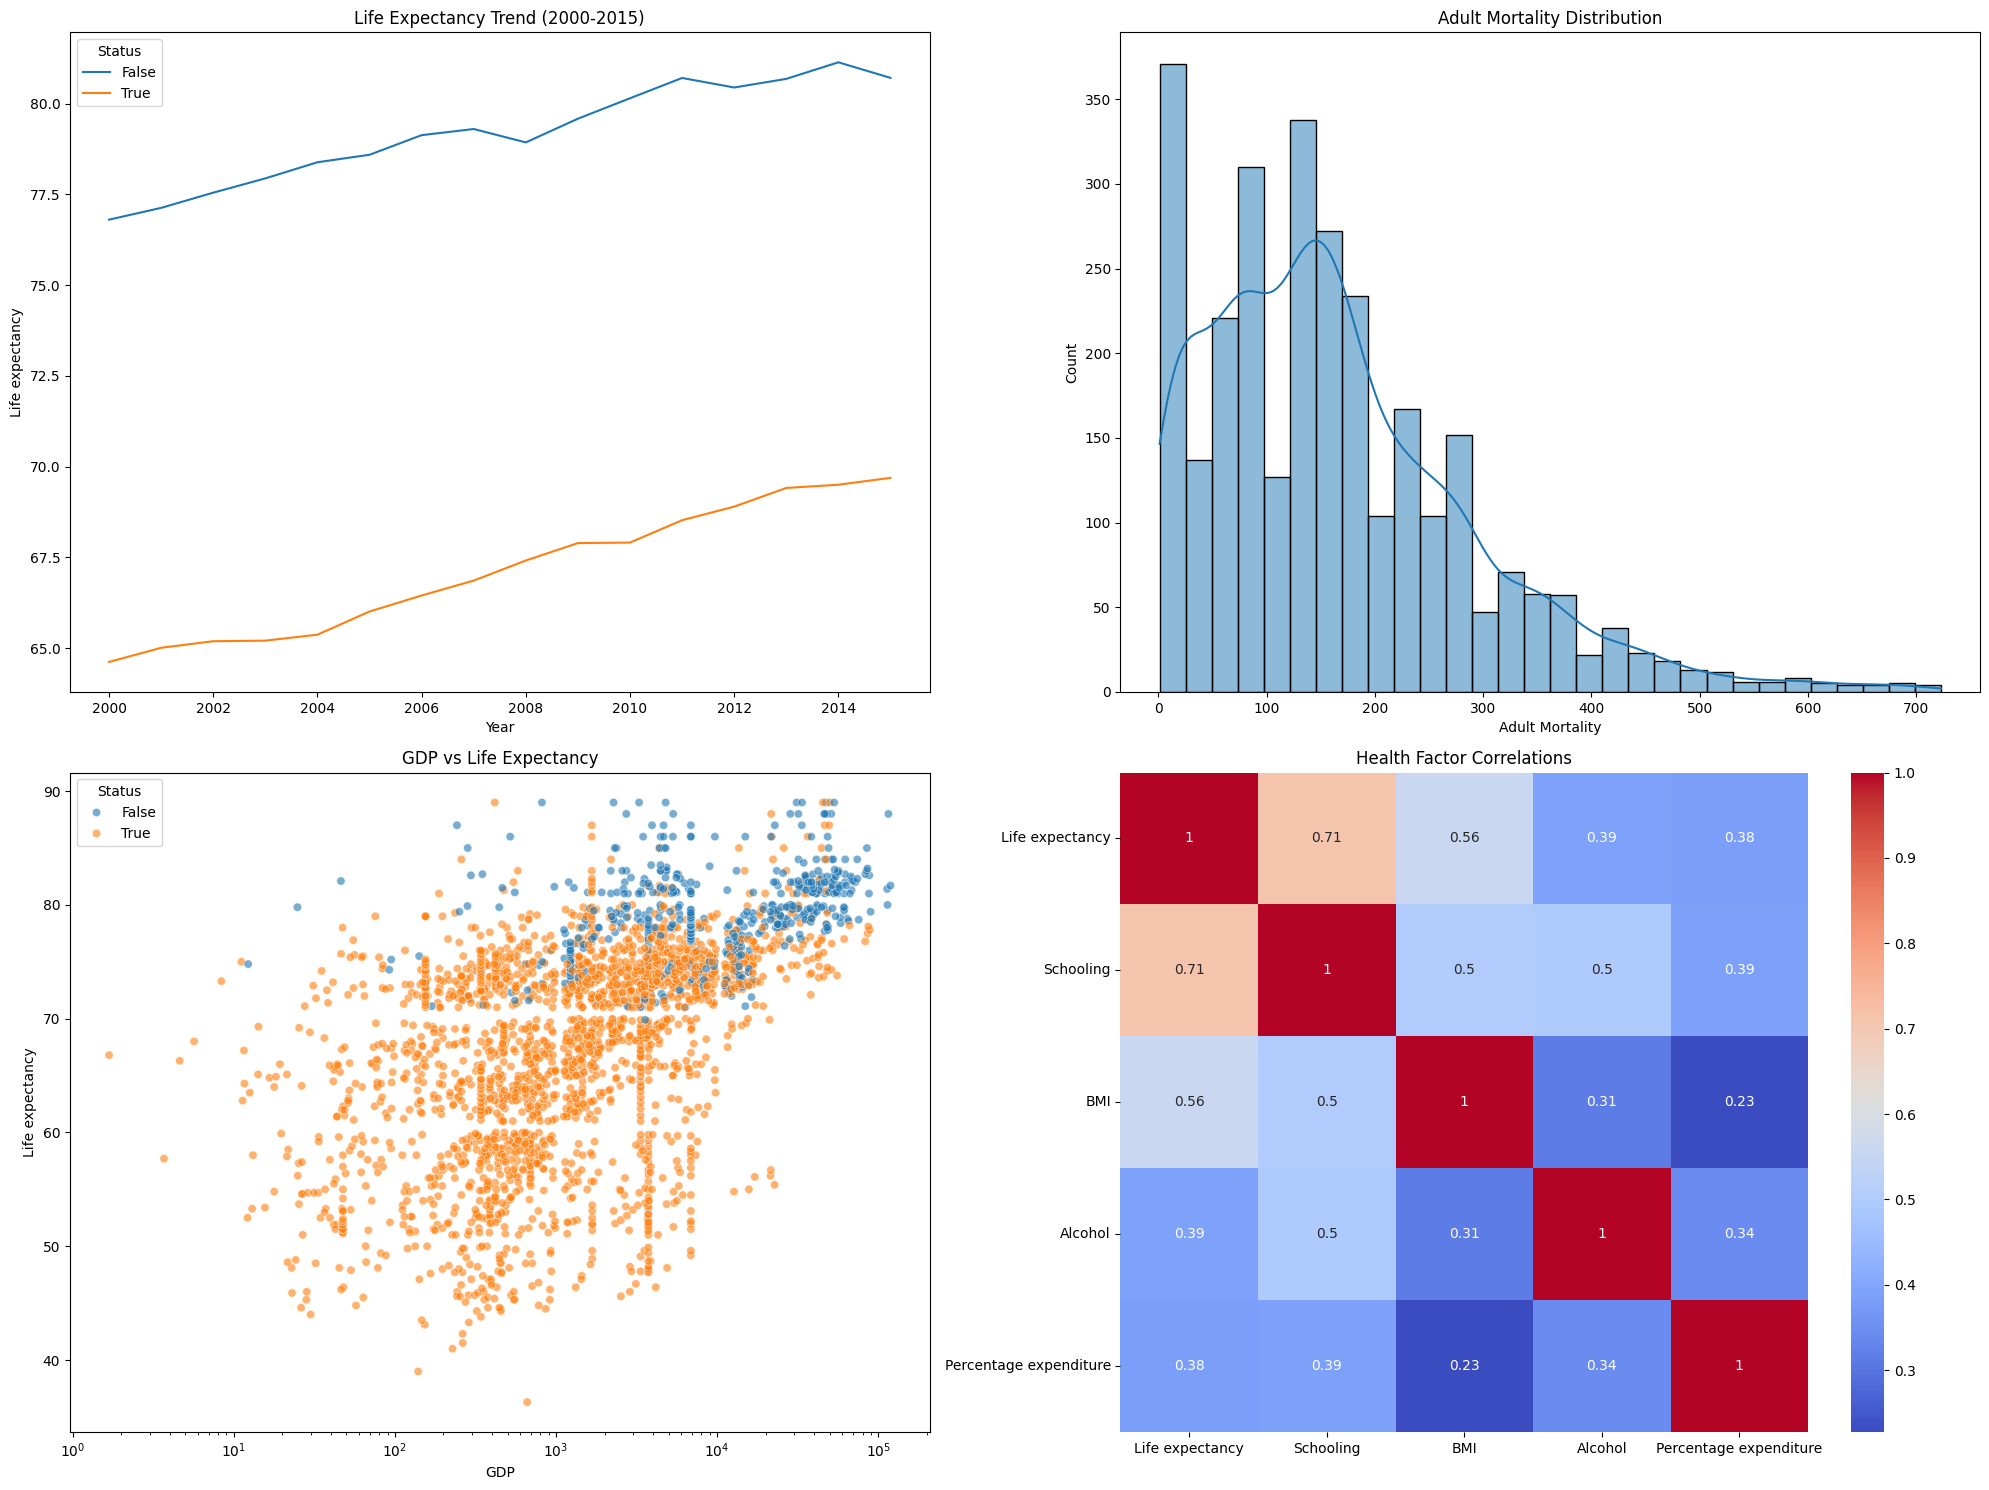

In [11]:
# Set figure size
plt.figure(figsize=(20, 15))

# 1. Temporal Trends
plt.subplot(2, 2, 1)
sns.lineplot(x='Year', y='Life expectancy', hue='Status', data=df, errorbar=None)
plt.title('Life Expectancy Trend (2000-2015)')

# 2. Mortality Distribution
plt.subplot(2, 2, 2)
sns.histplot(df['Adult Mortality'], bins=30, kde=True)
plt.title('Adult Mortality Distribution')

# 3. Economic vs Health Correlation
plt.subplot(2, 2, 3)
sns.scatterplot(x='GDP', y='Life expectancy', hue='Status', data=df, alpha=0.6)
plt.xscale('log')
plt.title('GDP vs Life Expectancy')

# 4. Health Factors Heatmap
plt.subplot(2, 2, 4)
corr_matrix = df[['Life expectancy', 'Schooling', 'BMI', 'Alcohol', 'Percentage expenditure']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Health Factor Correlations')

plt.tight_layout()
plt.show()


Build Linear Model From Scratch

Numerical Features Selected:
['Adult Mortality', 'infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']


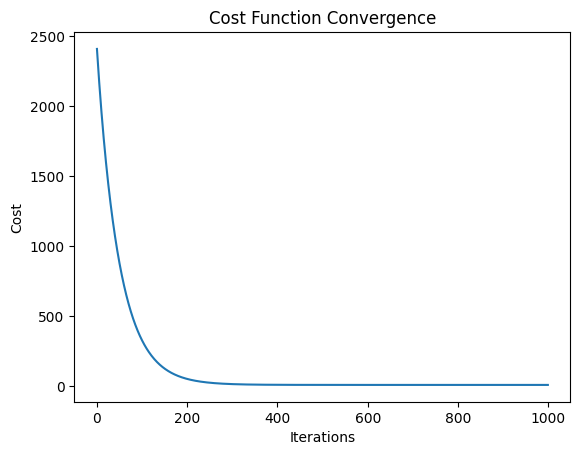

Optimal Theta: [69.48610645 -2.4765054   0.28003228  0.10986599  0.43237566 -0.36102299
 -0.33662577  0.70435044 -0.3850664   0.61128868  0.14464286  1.20348277
 -2.12086381  0.39473273  0.17305094 -0.35906578 -0.15404191  1.1540352
  2.50252819]
RMSE: 4.67795483432288
R-squared: 0.7726886286633831


In [14]:
# Drop 'Country', 'Year', and 'Life expectancy' columns
numerical_features = df[features].select_dtypes(include=[np.number]).columns.tolist()

features = numerical_features
# Target variable
target = 'Life expectancy'

def train_test_split(X, y, test_size=0.2):
    split_idx = int(len(X) * (1 - test_size))
    return X[:split_idx], X[split_idx:], y[:split_idx], y[split_idx:]

X = df[features].values
y = df[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Normalize the features
def normalize(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

X_train = normalize(X_train)
X_test = normalize(X_test)

# Add bias term (intercept)
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

# Initialize parameters
theta = np.zeros(X_train.shape[1])

# Define cost function
def cost_function(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Implement gradient descent
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []
    
    for _ in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        theta -= (alpha / m) * X.T.dot(errors)
        cost_history.append(cost_function(X, y, theta))
    
    return theta, cost_history

# Train model
alpha = 0.01  # Learning rate
iterations = 1000
optimal_theta, cost_history = gradient_descent(X_train, y_train, theta, alpha, iterations)

# Predict and evaluate
y_pred = X_test.dot(optimal_theta)
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
r2 = 1 - (np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

# Plot cost function history
plt.plot(range(iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.show()

# Output results
print(f'Optimal Theta: {optimal_theta}')
print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')

Select Features and Target Variable

In [28]:
# Features
numerical_features = df[features].select_dtypes(include=[np.number]).columns.tolist()

features = numerical_features

# Target variable
target = 'Life expectancy'

# Create feature matrix (X) and target vector (y)
X = df[features].values
y = df[target].values


Train-Test Split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 Build Model 1 - Linear Regression

In [30]:
# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression Results:")
print(f"RMSE: {rmse_linear}")
print(f"R-squared: {r2_linear}")

Linear Regression Results:
RMSE: 4.2322896608616265
R-squared: 0.8013298731535117


Build Model 2 - Random Forest Regressor

In [31]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor Results:")
print(f"RMSE: {rmse_rf}")
print(f"R-squared: {r2_rf}")

Random Forest Regressor Results:
RMSE: 1.9115650620354396
R-squared: 0.9594715522328583


Compare Model Performance

In [32]:
# Compare results
print("Comparison of Models:")
print(f"Linear Regression - RMSE: {rmse_linear}, R-squared: {r2_linear}")
print(f"Random Forest Regressor - RMSE: {rmse_rf}, R-squared: {r2_rf}")

if rmse_linear < rmse_rf:
    print("Linear Regression performed better.")
else:
    print("Random Forest Regressor performed better.")

Comparison of Models:
Linear Regression - RMSE: 4.2322896608616265, R-squared: 0.8013298731535117
Random Forest Regressor - RMSE: 1.9115650620354396, R-squared: 0.9594715522328583
Random Forest Regressor performed better.


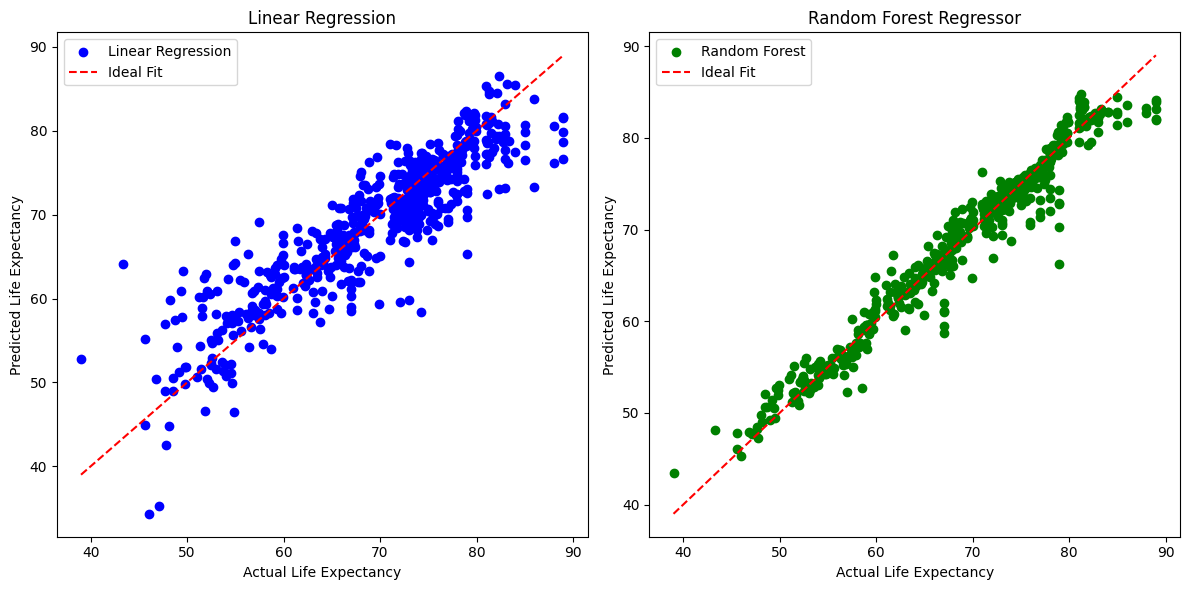

In [33]:
# Plot Predicted vs Actual for Linear Regression
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, color='blue', label='Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Linear Regression')
plt.legend()

# Plot Predicted vs Actual for Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, color='green', label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Random Forest Regressor')
plt.legend()

plt.tight_layout()
plt.show()

 Cross-Validation for Model 1 - Linear Regression

In [34]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation for Linear Regression
linear_cv_scores = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to RMSE
linear_cv_rmse = np.sqrt(-linear_cv_scores)

print("Linear Regression Cross-Validation Results:")
print(f"Mean RMSE: {linear_cv_rmse.mean()}")
print(f"Standard Deviation of RMSE: {linear_cv_rmse.std()}")

Linear Regression Cross-Validation Results:
Mean RMSE: 4.086728084889233
Standard Deviation of RMSE: 0.20512589712986148


 Cross-Validation for Model 2 - Random Forest Regressor

In [35]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Initialize Grid Search with 5-fold cross-validation
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit Grid Search to the training data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = np.sqrt(-grid_search_rf.best_score_)

print("Random Forest Best Parameters:")
print(best_params_rf)
print(f"Best RMSE: {best_score_rf}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Random Forest Best Parameters:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best RMSE: 1.9373677288309297


Evaluate Models with Optimized Hyperparameters

In [36]:
# Predictions and evaluation for Linear Regression
y_pred_linear = linear_model.predict(X_test)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression Test Set Results:")
print(f"RMSE: {rmse_linear}")
print(f"R-squared: {r2_linear}")

Linear Regression Test Set Results:
RMSE: 4.2322896608616265
R-squared: 0.8013298731535117


Evaluate Random Forest with Best Parameters

In [37]:
# Train the Random Forest model with the best parameters
best_rf_model = grid_search_rf.best_estimator_

# Predictions and evaluation for Random Forest
y_pred_rf = best_rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Test Set Results:")
print(f"RMSE: {rmse_rf}")
print(f"R-squared: {r2_rf}")

Random Forest Test Set Results:
RMSE: 1.9110891889933939
R-squared: 0.9594917283654871


In [38]:
print("Comparison of Models After Hyperparameter Tuning:")
print(f"Linear Regression - RMSE: {rmse_linear}, R-squared: {r2_linear}")
print(f"Random Forest Regressor - RMSE: {rmse_rf}, R-squared: {r2_rf}")

if rmse_linear < rmse_rf:
    print("Linear Regression performed better.")
else:
    print("Random Forest Regressor performed better.")

Comparison of Models After Hyperparameter Tuning:
Linear Regression - RMSE: 4.2322896608616265, R-squared: 0.8013298731535117
Random Forest Regressor - RMSE: 1.9110891889933939, R-squared: 0.9594917283654871
Random Forest Regressor performed better.


Feature Selection for Model 1 - Linear Regression

In [39]:
# Compute correlation matrix
correlation_matrix = df[features + [target]].corr()

# Extract correlations with the target variable
target_correlations = correlation_matrix[target].drop(target)

# Sort by absolute correlation
target_correlations = target_correlations.abs().sort_values(ascending=False)

print("Feature Correlations with Life Expectancy:")
print(target_correlations)

Feature Correlations with Life Expectancy:
Schooling                          0.713054
Adult Mortality                    0.696390
Income composition of resources    0.668997
BMI                                0.556901
HIV/AIDS                           0.556703
Diphtheria                         0.470163
thinness 1-19 years                0.468002
thinness 5-9 years                 0.462473
Polio                              0.456341
GDP                                0.432346
Alcohol                            0.388918
Percentage expenditure             0.381418
under-five deaths                  0.222738
Total expenditure                  0.208844
infant deaths                      0.196769
Measles                            0.157767
Hepatitis B                        0.139219
Population                         0.007283
Name: Life expectancy, dtype: float64


Select Top Features

In [41]:
# Select top 4 features based on correlation
top_features_linear = target_correlations.index[:10].tolist()
print("Top Features for Linear Regression:")
print(top_features_linear)


Top Features for Linear Regression:
['Schooling', 'Adult Mortality', 'Income composition of resources', 'BMI', 'HIV/AIDS', 'Diphtheria', 'thinness 1-19 years', 'thinness 5-9 years', 'Polio', 'GDP']


Feature Selection for Model 2 - Random Forest Regressor

In [42]:
# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=features)

# Sort by importance
feature_importances = feature_importances.sort_values(ascending=False)

print("Feature Importances from Random Forest:")
print(feature_importances)

Feature Importances from Random Forest:
HIV/AIDS                           0.595970
Income composition of resources    0.147993
Adult Mortality                    0.136438
thinness 5-9 years                 0.026682
BMI                                0.016946
under-five deaths                  0.016104
Schooling                          0.011435
Alcohol                            0.006709
Total expenditure                  0.006158
thinness 1-19 years                0.005194
Diphtheria                         0.004622
Polio                              0.004269
infant deaths                      0.004261
Measles                            0.004143
Percentage expenditure             0.003537
Population                         0.003442
GDP                                0.003205
Hepatitis B                        0.002893
dtype: float64


In [43]:
# Select top 4 features based on importance
top_features_rf = feature_importances.index[:10].tolist()
print("Top Features for Random Forest Regressor:")
print(top_features_rf)

Top Features for Random Forest Regressor:
['HIV/AIDS', 'Income composition of resources', 'Adult Mortality', 'thinness 5-9 years', 'BMI', 'under-five deaths', 'Schooling', 'Alcohol', 'Total expenditure', 'thinness 1-19 years']


 Evaluate Models with Selected Features

In [44]:
# Convert X_train and X_test to DataFrames with feature names
X_train = pd.DataFrame(X_train, columns=features)
X_test = pd.DataFrame(X_test, columns=features)

# Use top features for Linear Regression
X_train_linear = X_train[top_features_linear]
X_test_linear = X_test[top_features_linear]

# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_linear, y_train)

# Predictions and evaluation
y_pred_linear = linear_model.predict(X_test_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression Results with Selected Features:")
print(f"RMSE: {rmse_linear}")
print(f"R-squared: {r2_linear}")

Linear Regression Results with Selected Features:
RMSE: 4.430274339684928
R-squared: 0.7823077126497363


In [45]:
# Use top features for Random Forest
X_train_rf = X_train[top_features_rf]
X_test_rf = X_test[top_features_rf]

# Train Random Forest model
rf_model_selected = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_selected.fit(X_train_rf, y_train)

# Predictions and evaluation
y_pred_rf = rf_model_selected.predict(X_test_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Results with Selected Features:")
print(f"RMSE: {rmse_rf}")
print(f"R-squared: {r2_rf}")

Random Forest Results with Selected Features:
RMSE: 1.8475001721392106
R-squared: 0.9621426005779949


In [46]:
print("\nComparison of Models After Feature Selection:")
print(f"Linear Regression - RMSE: {rmse_linear}, R-squared: {r2_linear}")
print(f"Random Forest Regressor - RMSE: {rmse_rf}, R-squared: {r2_rf}")

if rmse_linear < rmse_rf:
    print("\nLinear Regression performed better.")
else:
    print("\nRandom Forest Regressor performed better.")


Comparison of Models After Feature Selection:
Linear Regression - RMSE: 4.430274339684928, R-squared: 0.7823077126497363
Random Forest Regressor - RMSE: 1.8475001721392106, R-squared: 0.9621426005779949

Random Forest Regressor performed better.


 Finalize the Best Model
 
Random Forest Regressor is the Best Model

In [49]:
# Best hyperparameters for Random Forest (from GridSearchCV)
best_params_rf = {
    'n_estimators': 200,
    'max_depth': 20,
    'min_samples_split': 2,
    'min_samples_leaf': 1
}

# Best subset of features for Random Forest (from feature importance)
top_features_rf = ['HIV/AIDS', 'Income composition of resources', 'Adult Mortality', 'thinness 5-9 years', 'BMI',
                   'under-five deaths', 'Schooling', 'Alcohol', 'Total expenditure', 'thinness 1-19 years']

# Subset the data using top_features_rf
X_train_final = X_train[top_features_rf]
X_test_final = X_test[top_features_rf]

# Use all features
X_train_final = X_train
X_test_final = X_test

# Train the final Random Forest model with best hyperparameters
final_model = RandomForestRegressor(
    n_estimators=best_params_rf['n_estimators'],
    max_depth=best_params_rf['max_depth'],
    min_samples_split=best_params_rf['min_samples_split'],
    min_samples_leaf=best_params_rf['min_samples_leaf'],
    random_state=42
)

final_model.fit(X_train_final, y_train)

# Predictions and evaluation
y_pred_final = final_model.predict(X_test_final)
rmse_final = np.sqrt(mean_squared_error(y_test, y_pred_final))
r2_final = r2_score(y_test, y_pred_final)

print("\nFinal Random Forest Model Results (Full Feature Set):")
print(f"RMSE: {rmse_final}")
print(f"R-squared: {r2_final}")


Final Random Forest Model Results (Full Feature Set):
RMSE: 1.9110891889933939
R-squared: 0.9594917283654871


In [50]:
print("\nComparison of Model Performance:")
print(f"Initial Random Forest RMSE: {rmse_rf}, R-squared: {r2_rf}")
print(f"Final Model RMSE: {rmse_final}, R-squared: {r2_final}")

if rmse_final < rmse_rf:
    print("\nThe Final Model's performance improved!")
else:
    print("\nThe Final Model's performance did not improve.")


Comparison of Model Performance:
Initial Random Forest RMSE: 1.8475001721392106, R-squared: 0.9621426005779949
Final Model RMSE: 1.9110891889933939, R-squared: 0.9594917283654871

The Final Model's performance did not improve.
